## <font color='purple'> SML Assignment 3: Polynomial Linear Regression </font>
### Kaustubh Raykar
PRN : 21070126048 <br> 
<break> AIML A3 
 

<font color='blue'>Q1. Brooklyn Real Estate Listings </font>

### <font color='teal'>Step 1 : Importing Libraries </font>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


### <font color='teal'> Step 2: Upload Dataset </font>

In [64]:
df=pd.read_csv("/content/brooklyn_listings.csv")
df

,Unnamed: 0,price,bedrooms,bathrooms,sqft,neighborhood,status,address
0,1,4100000.0,4,5,2940.0,Park Slope,sold,"336A 4th St, Brooklyn, NY 11215"
1,2,1020000.0,3,1,NaN,Park Slope,sold,"411 15th St #K, Brooklyn, NY 11215"
2,3,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #D, Brooklyn, NY 11217"
3,4,45000.0,0,1,NaN,Park Slope,sold,"65 Saint Johns Pl #E, Brooklyn, NY 11217"
4,5,908000.0,0,1,1066.0,Park Slope,sold,"397 1st St #4R, Brooklyn, NY 11215"
...,...,...,...,...,...,...,...,...
14728,14620,630000.0,0,1,1492.0,Wingate,listed,"770A Lefferts Ave #4L, Brooklyn, NY 11203"
14729,14720,998000.0,4,2,1584.0,Wingate,listed,"575 E New York Ave #A, Brooklyn, NY 11225"
14730,14820,830000.0,0,1,564.0,Wingate,listed,"833 Maple St, Brooklyn, NY 11203"
14731,14920,240000.0,0,1,NaN,Wingate,listed,"446 Kingston Ave #C20, Brooklyn, NY 11225"


### <font color='teal'>Step 3: Data Description </font>

In [65]:
# Dropping the unnecessary values 
df = df.drop(columns=["neighborhood","address","Unnamed: 0"])
df

,price,bedrooms,bathrooms,sqft,status
0,4100000.0,4,5,2940.0,sold
1,1020000.0,3,1,NaN,sold
2,45000.0,0,1,NaN,sold
3,45000.0,0,1,NaN,sold
4,908000.0,0,1,1066.0,sold
...,...,...,...,...,...
14728,630000.0,0,1,1492.0,listed
14729,998000.0,4,2,1584.0,listed
14730,830000.0,0,1,564.0,listed
14731,240000.0,0,1,NaN,listed


In [66]:
#replacing "sold" as 1
# replacing "listed" as 0 
df['status'] = df['status'].replace({'sold': 1, 'listed': 0})
df

,price,bedrooms,bathrooms,sqft,status
0,4100000.0,4,5,2940.0,1
1,1020000.0,3,1,NaN,1
2,45000.0,0,1,NaN,1
3,45000.0,0,1,NaN,1
4,908000.0,0,1,1066.0,1
...,...,...,...,...,...
14728,630000.0,0,1,1492.0,0
14729,998000.0,4,2,1584.0,0
14730,830000.0,0,1,564.0,0
14731,240000.0,0,1,NaN,0


In [67]:
# Checking head of the dataset
df.head()

,price,bedrooms,bathrooms,sqft,status
0,4100000.0,4,5,2940.0,1
1,1020000.0,3,1,NaN,1
2,45000.0,0,1,NaN,1
3,45000.0,0,1,NaN,1
4,908000.0,0,1,1066.0,1


In [68]:
# Checking the shape of df
df.shape

(14733, 5)

In [69]:
# Checking the descriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14733 entries, 0 to 14732
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      14732 non-null  float64
 1   bedrooms   14733 non-null  int64  
 2   bathrooms  14733 non-null  int64  
 3   sqft       12013 non-null  float64
 4   status     14733 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 575.6 KB


In [70]:
#checking the data description
df.describe()

,price,bedrooms,bathrooms,sqft,status
count,1.473200e+04,14733.000000,14733.000000,12013.000000,14733.000000
mean,1.318167e+06,2.771669,2.304079,2142.798885,0.579855
std,1.825168e+06,2.888247,9.230676,6598.128111,0.493599
min,1.000000e+00,0.000000,1.000000,1.000000,0.000000
25%,5.750000e+05,1.000000,1.000000,980.000000,0.000000
50%,9.300000e+05,2.000000,2.000000,1596.000000,1.000000
75%,1.550000e+06,4.000000,3.000000,2628.000000,1.000000
max,8.680000e+07,59.000000,1102.000000,443522.000000,1.000000


### <font color='teal'>Step 4 : Data Cleaning </font>

In [71]:
#Check for null values
df.isnull().sum()
#there are null/missing values 

price           1
bedrooms        0
bathrooms       0
sqft         2720
status          0
dtype: int64

In [72]:
#Dropping the null values 
df.dropna(inplace = True)
df

,price,bedrooms,bathrooms,sqft,status
0,4100000.0,4,5,2940.0,1
4,908000.0,0,1,1066.0,1
6,2600000.0,5,4,3600.0,1
7,4050000.0,4,4,3600.0,1
8,2400000.0,3,3,1428.0,1
...,...,...,...,...,...
14727,765000.0,2,1,867.0,0
14728,630000.0,0,1,1492.0,0
14729,998000.0,4,2,1584.0,0
14730,830000.0,0,1,564.0,0


In [73]:
df.dtypes

price        float64
bedrooms       int64
bathrooms      int64
sqft         float64
status         int64
dtype: object

### <font color='teal'>Step 5: Data Visualisation , EDA </font> 

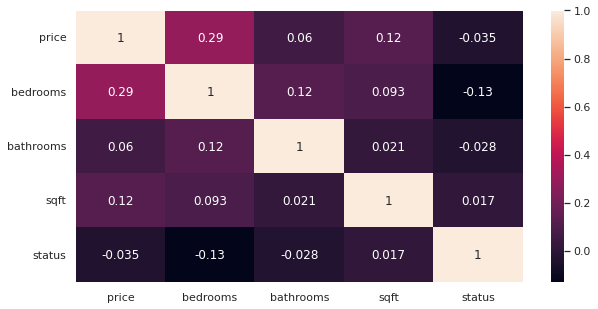

In [74]:
#plotting heatmap
import seaborn as sns
cor=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor, annot = True)
plt.show()

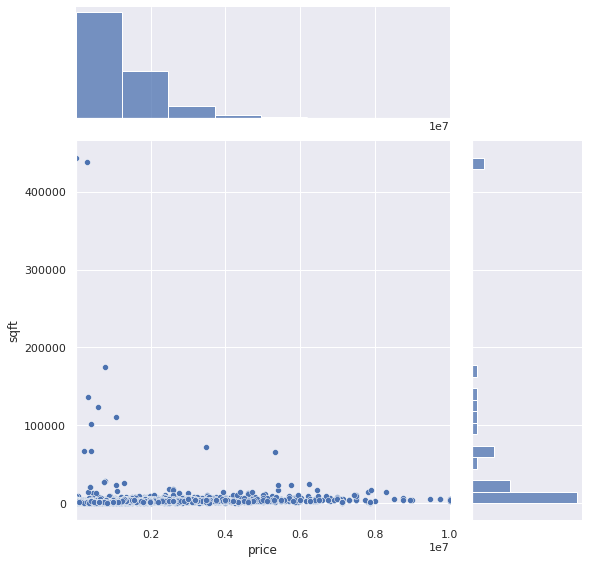

In [75]:
#sns.jointplot(data=df, x="price", y="sqft", palette = "plasma")
sns.set_style('darkgrid')
sns.jointplot(data=df, x="price", y="sqft", palette="plasma", xlim=(10, 10**7), height=8, ratio=3, marginal_kws=dict(bins=30))
plt.xscale('log')
plt.show()

In [76]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft', 'status'], dtype='object')

### <font color='teal'>Step 7: Splitting the data </font>

In [77]:
#splitting df two parts
x = df[['bedrooms','bathrooms','sqft','status']]
y = df['price']

In [78]:
# x is independent feature 
x

,bedrooms,bathrooms,sqft,status
0,4,5,2940.0,1
4,0,1,1066.0,1
6,5,4,3600.0,1
7,4,4,3600.0,1
8,3,3,1428.0,1
...,...,...,...,...
14727,2,1,867.0,0
14728,0,1,1492.0,0
14729,4,2,1584.0,0
14730,0,1,564.0,0


In [79]:
# y is dependent feature 
y

0        4100000.0
4         908000.0
6        2600000.0
7        4050000.0
8        2400000.0
           ...    
14727     765000.0
14728     630000.0
14729     998000.0
14730     830000.0
14732     629000.0
Name: price, Length: 12012, dtype: float64

### <font color='teal'>Step 8 : Split x and y into training and test data set  </font>

In [80]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size = 0.2, random_state=100)

In [81]:
#x in train testing values in x and y 
#y in train testing values in x and y 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9609, 4)
(2403, 4)
(9609,)
(2403,)


### <font color='teal'>Step 9: Scaling the data  </font>

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #StandardScaler: transforming data into particular size
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [83]:
#x in train testing values in x and y 
#y in train testing values in x and y 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9609, 4)
(2403, 4)
(9609,)
(2403,)


### <font color='teal'>Step 10: Import Regression Model  </font>

In [84]:
#create a polynomial features object with degree 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
#uska poly reg is my poly , xpoly is my xtrain poly , 



In [85]:
# transform the predictor variables to polynomial features
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [86]:
# fit the linear regression model
model = LinearRegression()
model.fit(x_train_poly, y_train)


LinearRegression()

### <font color='teal'>Step 11: Calculating slope and intercept for each factor  </font>

In [87]:
print("Intercept: ",model.intercept_)
print("Coefficients: ")
list(zip(x,model.coef_))

Intercept:  81992310058433.88
Coefficients: 


[('bedrooms', 0.0),
 ('bathrooms', -66583.96048860758),
 ('sqft', 3064922.5765790525),
 ('status', 990830.0091521834)]

### <font color='teal'>Step 12: Predicting Values </font>

In [88]:
# predict the target variable using the test data
y_pred = model.predict(x_test_poly)
print("Prediction for test set: {}".format(y_pred))


Prediction for test set: [1438885.296875 1182236.71875  1414221.25     ... 1772627.46875
  940579.1875   1441780.375   ]


In [89]:
model_diff = pd.DataFrame({'Actual value': y_test,'Predicted value': y_pred})
model_diff.head(10)

,Actual value,Predicted value
2807,1610000.0,1.438885e+06
13970,1650000.0,1.182237e+06
3796,760000.0,1.414221e+06
378,1150000.0,1.197643e+06
2022,1250000.0,1.405678e+06
5067,1885000.0,1.500709e+06
389,1.0,9.250838e+05
5946,649000.0,1.053560e+06
9176,1680000.0,1.550710e+06
9763,885000.0,1.389963e+06


### <font color='teal'> Step 13: Calculating R2E, MAE, MSE, RMSE </font>

In [90]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

meanAbErr = mean_absolute_error(y_pred,y_test)
meanSqErr = mean_squared_error(y_test, y_pred) 
rootMeanSqErr = np.sqrt(mean_squared_error(y_test, y_pred)) 
print('R_squared: {:.2f}'.format(r2_score(y_test,y_pred))) 
print('Mean Absolute Error:', meanAbErr) 
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R_squared: 0.09
Mean Absolute Error: 636646.748784072
Mean Square Error: 1829853101574.1206
Root Mean Square Error: 1352720.6295366832


### <font color='teal'>Step 14: Plotting values using a scatter plot </font>

<Figure size 600x600 with 0 Axes>

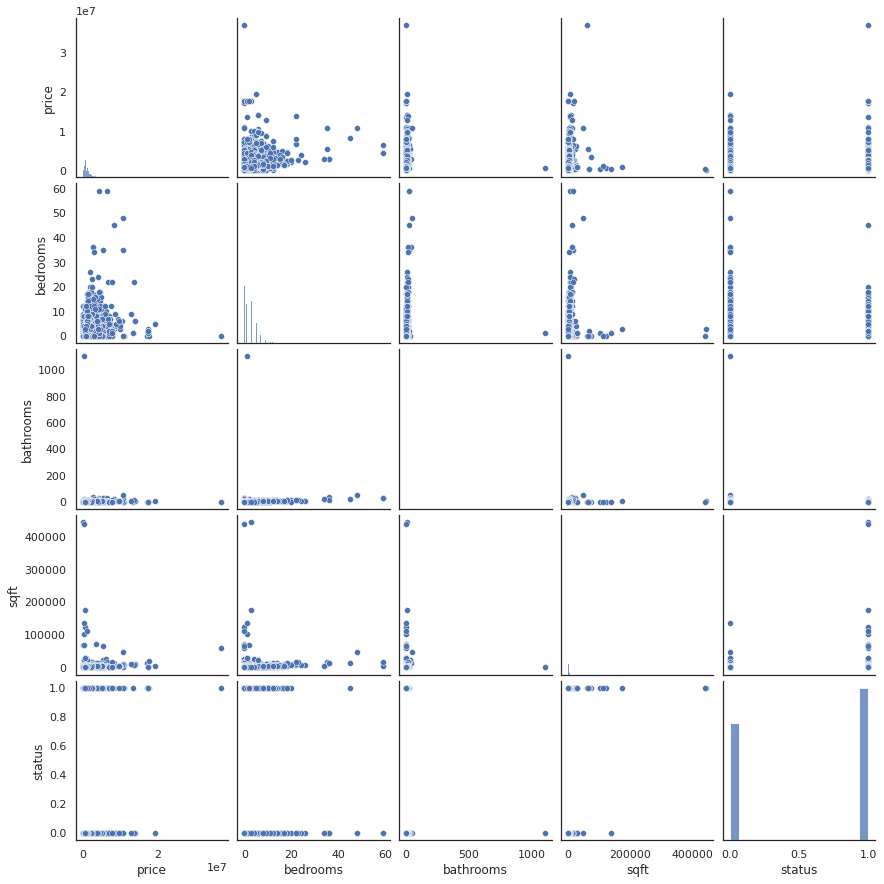

In [100]:
plt.figure(figsize=(6,6),dpi=100)
sns.pairplot(df)

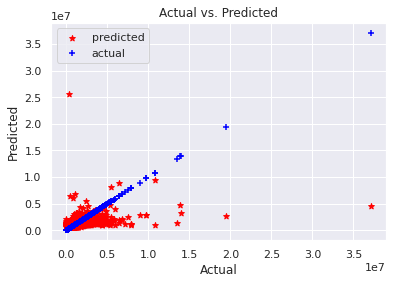

In [91]:
 plt.scatter(y_test, y_pred, marker='*', color='red', label='predicted')
plt.scatter(y_test, y_test, marker='+', color='blue', label='actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()

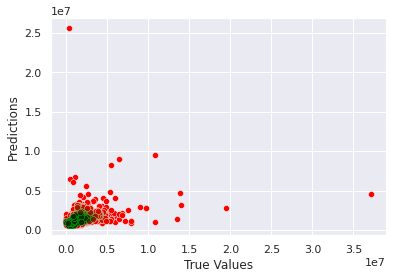

In [93]:
y_color = 'green'
x_color = 'red'

sns.scatterplot(x=y_test, y=y_pred, color=x_color)
plt.scatter(y_test, y_pred, color=y_color, alpha=0.01)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Thank youuuu :))